In [18]:
# Clustering: Takes a raw and groups the data into different clusters based on their similarities
# UnsupervisedL: The aim is to find patterns and similarities between the dataset
# Algorithms: 
#1. KMeans: Finds similarities based on the mean(continuous) e,g income, profits, age
#2.KModes: Finds similarities based on the most appearing value(categorical) e,g Conties, Crops....
#3. KPrototype: Combines both the mean and the mode to find similarities, e,g Performance(continuous) and Region(Categorical)

In [19]:
#KMeans 
# Step one: Import Data
import pandas
data = pandas.read_csv('data/Mall_Customers.csv')  
data



,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [20]:
# Analysis
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,199.000000,197.000000
mean,100.500000,38.850000,60.356784,50.324873
std,57.879185,13.969007,26.172859,25.639097
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.000000,35.000000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
#Preprocessing
#1. Outliers
#2. Empty records
data.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     1
Spending Score    3
dtype: int64

In [22]:
# Fill the empties on continuous variables(KMeans)
mean_income = data['Annual Income'].mean()
data['Annual Income'].fillna(mean_income,inplace=True)
data.isnull().sum()

mean_spending = data['Spending Score'].mean()
data['Spending Score'].fillna(mean_spending,inplace= True)
data.isnull().sum()

CustomerID        0
Gender            4
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [23]:
# Machine Learning
# Step1: Spliting your data into X - Featured Columns
matrix = data.values
X = matrix[:,2:5]


In [24]:
#Step2: Import Kmeans 
from sklearn.cluster import KMeans

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

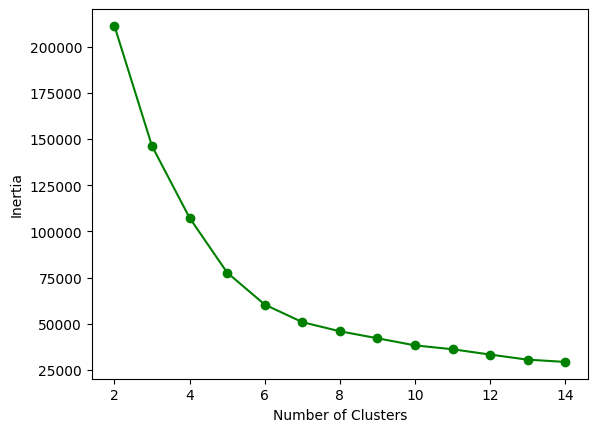

In [25]:
#Step3: Elbow Method 
#Tries to find the best number of clusters for a particular dataset
#Inertia: measures the rate of motion
from sklearn.cluster import KMeans
inertias = []
for k in range(2,15) : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,15),inertias, "o-g")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
#Step4: Fit the data(X) to the model and specify the number of clusters
model = KMeans(n_clusters=8,random_state=42)
model.fit(X)

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [27]:
# Step5: Get the Clusters
# centronoids: Cluster center
centronoids = model.cluster_centers_
centronoids

array([[ 27.2       ,  57.2839196 ,  49.63312183],
       [ 41.        , 109.7       ,  28.46497462],
       [ 32.74074074,  78.03703704,  81.59259259],
       [ 44.31818182,  25.77272727,  20.27272727],
       [ 56.34090909,  53.70454545,  49.38636364],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 41.96      ,  79.64      ,  15.4       ],
       [ 32.9       , 108.9       ,  84.2       ]])

In [28]:
# Display the centroinoids(mean) in a DataFrame
clusters = pandas.DataFrame(centronoids,columns=['Age','Annual Income','Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,27.200000,57.283920,49.633122
1,41.000000,109.700000,28.464975
2,32.740741,78.037037,81.592593
3,44.318182,25.772727,20.272727
4,56.340909,53.704545,49.386364
5,25.272727,25.727273,79.363636
6,41.960000,79.640000,15.400000
7,32.900000,108.900000,84.200000


In [29]:
# Generating the Cluster Members
data['Cluster Group'] = model.labels_
data

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster Group
0,1,Male,19,15.0,39.000000,3
1,2,Male,21,15.0,81.000000,5
2,3,Female,20,16.0,6.000000,3
3,4,Female,23,16.0,77.000000,5
4,5,Female,31,17.0,40.000000,3
...,...,...,...,...,...,...
195,196,Female,35,120.0,79.000000,7
196,197,Female,45,126.0,50.324873,1
197,198,Male,32,126.0,74.000000,7
198,199,Male,32,137.0,18.000000,1


In [30]:
# Generating different clusters from the Dataset
cluster0 = data[data['Cluster Group'] == 0]
cluster0.shape
cluster0.to_csv('Young_adults_high_earners_high_spenders.csv')

In [31]:
# Generate for cluster3
cluster3 = data[data['Cluster Group']==3]
cluster3.shape
cluster3.to_csv('Young_adults_low_earners_high_spenders.csv')

In [32]:
# Deep Learning: Advanced classification where machines(robots) learn from other sources e,g images, speech, video(Traffic light), ANN CNN
# Reinforcement Learning